# 1

## 1.1

In [7]:
def print_fields(obj):
    print(list(vars(obj).keys()))

## 1.2

In [8]:
def call_method(obj, method_name):
    getattr(obj, method_name)()

## 1.3

Класс C не может наследовать от A и B, так как B уже является подклассом A.

## 1.4

In [9]:
get_inheritance = lambda cls: ' -> '.join(c.__name__ for c in cls.__mro__)

# 2

## 2.1

In [10]:
class HashTable:
    def __init__(self, capacity=8):
        self._capacity = capacity
        self._table = [[] for _ in range(self._capacity)]
        self._size = 0

    def _hash(self, key):
        return hash(key) % self._capacity

    def __setitem__(self, key, value):
        idx = self._hash(key)
        for i, (k, v) in enumerate(self._table[idx]):
            if k == key:
                self._table[idx][i] = (key, value)
                return
        self._table[idx].append((key, value))
        self._size += 1

    def __getitem__(self, key):
        idx = self._hash(key)
        for k, v in self._table[idx]:
            if k == key:
                return v
        raise KeyError(key)

    def __len__(self):
        return self._size

    def __delitem__(self, key):
        idx = self._hash(key)
        for i, (k, v) in enumerate(self._table[idx]):
            if k == key:
                del self._table[idx][i]
                self._size -= 1
                return
        raise KeyError(key)

    def __iter__(self):
        for bucket in self._table:
            for k, v in bucket:
                yield k

    def keys(self):
        return iter(self)

    def values(self):
        for bucket in self._table:
            for k, v in bucket:
                yield v

    def items(self):
        for bucket in self._table:
            yield from bucket

# Тестирование
import random

original = dict()
custom = HashTable()

for _ in range(1000):
    key = random.randint(0, 1000)
    value = random.random()
    original[key] = value
    custom[key] = value

for key in original:
    assert custom[key] == original[key], "Ошибка чтения"

assert len(custom) == len(original), "Ошибка размера"

for key in list(original.keys())[:500]:
    del original[key]
    del custom[key]

for key in original:
    assert custom[key] == original[key], "Ошибка после удаления"

for i, k1 in enumerate(custom):
    for j, k2 in enumerate(custom):
        assert original[k1] == custom[k1], f"Ошибка вложенного цикла ({i}, {j})"

# 3

## 3.1

In [ ]:
# 3.1. 
class Num:
    def __init__(self, value):
        self.value = value

class Add:
    def __init__(self, left, right):
        self.left = left
        self.right = right

class Mul:
    def __init__(self, left, right):
        self.left = left
        self.right = right

ast = Add(Num(7), Mul(Num(3), Num(2)))

# 3.2. 
class PrintVisitor:
    def visit(self, node):
        method_name = f'visit_{node.__class__.__name__}'
        method = getattr(self, method_name)
        return method(node)
    
    def visit_Num(self, node):
        return str(node.value)
    
    def visit_Add(self, node):
        return f"({self.visit(node.left)} + {self.visit(node.right)})"
    
    def visit_Mul(self, node):
        return f"({self.visit(node.left)} * {self.visit(node.right)})"

pv = PrintVisitor()
print(pv.visit(ast))

# 3.3.
class CalcVisitor:
    def visit(self, node):
        method_name = f'visit_{node.__class__.__name__}'
        method = getattr(self, method_name)
        return method(node)
    
    def visit_Num(self, node):
        return node.value
    
    def visit_Add(self, node):
        return self.visit(node.left) + self.visit(node.right)
    
    def visit_Mul(self, node):
        return self.visit(node.left) * self.visit(node.right)

cv = CalcVisitor()
print(cv.visit(ast))

# 3.4. 
class StackVisitor:
    def visit(self, node):
        method_name = f'visit_{node.__class__.__name__}'
        method = getattr(self, method_name)
        return method(node)
    
    def visit_Num(self, node):
        return [f"PUSH {node.value}"]
    
    def visit_Add(self, node):
        left_code = self.visit(node.left)
        right_code = self.visit(node.right)
        return left_code + right_code + ["ADD"]
    
    def visit_Mul(self, node):
        left_code = self.visit(node.left)
        right_code = self.visit(node.right)
        return left_code + right_code + ["MUL"]

sv = StackVisitor()
print('\n'.join(sv.visit(ast)))

(7 + (3 * 2))
13
PUSH 7
PUSH 3
PUSH 2
MUL
ADD


# 4

## 4.1

In [ ]:
class HTML:
    def __init__(self):
        self._code = []
        self._context = []

    def body(self):
        return self._TagContext(self, 'body')

    def div(self):
        return self._TagContext(self, 'div')

    def p(self, text):
        self._code.append(f'<p>{text}</p>')

    def get_code(self):
        return '\n'.join(self._code)

    class _TagContext:
        def __init__(self, html, tag):
            self._html = html
            self._tag = tag

        def __enter__(self):
            self._html._code.append(f'<{self._tag}>')
            self._html._context.append(self._tag)
            return self

        def __exit__(self, exc_type, exc_val, exc_tb):
            tag = self._html._context.pop()
            self._html._code.append(f'</{tag}>')

html = HTML()
with html.body():
    with html.div():
        with html.div():
            html.p('Первая строка.')
            html.p('Вторая строка.')
        with html.div():
            html.p('Третья строка.')

print(html.get_code())

<body>
<div>
<div>
<p>Первая строка.</p>
<p>Вторая строка.</p>
</div>
<div>
<p>Третья строка.</p>
</div>
</div>
</body>


# 5

### 5.1

In [ ]:
import math

class SVG:
    def __init__(self):
        self._elements = [] 

    def line(self, x1: float, y1: float, x2: float, y2: float, color: str = 'black', stroke_width: float = 1.0):
        line_svg = (
            f'<line x1="{float(x1):.6f}" y1="{float(y1):.6f}" '
            f'x2="{float(x2):.6f}" y2="{float(y2):.6f}" '
            f'stroke="{color}" stroke-width="{float(stroke_width):.6f}" />'
        )
        self._elements.append(line_svg)

    def circle(self, cx: float, cy: float, r: float, color: str = 'red', stroke: str = 'none', stroke_width: float = 0.0):
        circle_svg = (
            f'<circle cx="{float(cx):.6f}" cy="{float(cy):.6f}" '
            f'r="{float(r):.6f}" fill="{color}" '
            f'stroke="{stroke}" stroke-width="{float(stroke_width):.6f}" />'
        )
        self._elements.append(circle_svg)

    def get_svg_content(self, width: float, height: float) -> str:
        svg_header = (
            f'<svg version="1.1" width="{float(width):.6f}" height="{float(height):.6f}" '
            f'xmlns="http://www.w3.org/2000/svg">'
        )
        svg_footer = '</svg>'

        content = f"{svg_header}\n" + "\n".join(self._elements) + f"\n{svg_footer}"
        return content

    def save(self, filename: str, width: float, height: float):
        svg_content = self.get_svg_content(width, height)
        try:
            with open(filename, 'w', encoding='utf-8') as f:
                f.write(svg_content)
            print(f"SVG saved successfully to '{filename}'")
        except IOError as e:
            print(f"Error saving file '{filename}': {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    svg = SVG()

    svg.line(10, 10, 60, 10, color='black')
    svg.line(60, 10, 60, 60, color='black')
    svg.line(60, 60, 10, 60, color='black')
    svg.line(10, 60, 10, 10, color='black', stroke_width=2) 

    
    svg.circle(10, 10, r=5, color='red')
    svg.circle(60, 10, r=5, color='blue', stroke='black', stroke_width=1) 
    svg.circle(60, 60, r=5, color='green')
    svg.circle(10, 60, r=5, color='yellow')

    svg.circle(35, 35, r=10, color='purple')

    output_filename = 'pic.svg'
    canvas_width = 100
    canvas_height = 100
    svg.save(output_filename, canvas_width, canvas_height)


SVG saved successfully to 'pic.svg'


### 5.2

Координаты узлов после разметки:
Node 4: (x=0, y=150)
Node 3: (x=25, y=100)
Node 5: (x=50, y=150)
Node 2: (x=75, y=50)
Node 7: (x=100, y=150)
Node 6: (x=125, y=100)
Node 1: (x=150, y=0)
Node 10: (x=175, y=150)
Node 9: (x=200, y=100)
Node 12: (x=225, y=200)
Node 11: (x=250, y=150)
Node 13: (x=275, y=200)
Node 8: (x=300, y=50)
Node 14: (x=325, y=100)
--------------------


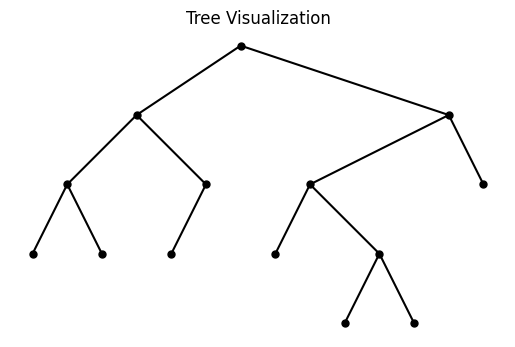

In [ ]:
import matplotlib.pyplot as plt

scale_x = 25
scale_y = 50

class Tree:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        self.x = 0
        self.y = 0

    def __repr__(self):
        return f"Node({self.val}, x={self.x}, y={self.y})"

class KnuthLayout:
    def __init__(self):
        self.current_x_index = 0

    def _layout_recursive(self, node, depth):
        if node is None:
            return

        self._layout_recursive(node.left, depth + 1)

        node.y = depth * scale_y
        node.x = self.current_x_index * scale_x
        self.current_x_index += 1

        self._layout_recursive(node.right, depth + 1)

    def layout(self, root_node):
        if root_node is None:
            return
        self.current_x_index = 0
        self._layout_recursive(root_node, 0)

def get_coords(node, coords_list):
    if node is None:
        return
    coords_list.append(((node.x, node.y), node.val))
    if node.left:
        coords_list.append(((node.x, node.y), (node.left.x, node.left.y)))
        get_coords(node.left, coords_list)
    if node.right:
        coords_list.append(((node.x, node.y), (node.right.x, node.right.y)))
        get_coords(node.right, coords_list)

def plot_tree(root_node, title="Tree Visualization"):
    coords = []
    get_coords(root_node, coords)

    if not coords:
        print("Tree is empty or layout failed.")
        return

    fig, ax = plt.subplots()

    nodes_x = []
    nodes_y = []
    node_labels = {}

    for item in coords:
        if isinstance(item[1], int) or isinstance(item[1], str): 
            coord, val = item
            nodes_x.append(coord[0])
            nodes_y.append(coord[1])
            node_labels[coord] = val
        else: 
            start, end = item
            ax.plot([start[0], end[0]], [start[1], end[1]], 'k-') 

    
    ax.plot(nodes_x, nodes_y, 'ko', markersize=5)


    
    ax.set_aspect('equal')
    ax.invert_yaxis()  
    ax.axis('off')     
    plt.title(title)
    plt.show()


tree_2 = Tree(2, Tree(3, Tree(4), Tree(5)), Tree(6, Tree(7)))
tree_8 = Tree(8, Tree(9, Tree(10), Tree(11, Tree(12), Tree(13))), Tree(14))
tree = Tree(1, tree_2, tree_8)

layout_manager = KnuthLayout()
layout_manager.layout(tree)

def print_coords_inorder(node):
    if node is None:
        return
    print_coords_inorder(node.left)
    print(f"Node {node.val}: (x={node.x}, y={node.y})")
    print_coords_inorder(node.right)

print("Координаты узлов после разметки:")
print_coords_inorder(tree)
print("-" * 20)

plot_tree(tree)


# 7

## 7.1

In [ ]:
import inspect
import importlib.util
from pathlib import Path

def generate_module_docs(module_path: str, output_path: str = None) -> str:

    module_name = Path(module_path).stem
    spec = importlib.util.spec_from_file_location(module_name, module_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    
    md_lines = [f"# Модуль {module_name}"]
    

    if module.__doc__:
        md_lines.append(module.__doc__.strip())

    for name, obj in inspect.getmembers(module, inspect.isclass):
        if obj.__module__ == module_name: 
            md_lines.append(f"\n## Класс {name}")
            if obj.__doc__:
                md_lines.append(obj.__doc__.strip())
            
            for meth_name, meth in inspect.getmembers(obj, inspect.isfunction):
                sig = inspect.signature(meth)
                md_lines.append(
                    f"\n* **Метод** `{meth_name}{sig}`"
                )
                if meth.__doc__:
                    md_lines.append(meth.__doc__.strip())
    
    for name, obj in inspect.getmembers(module, inspect.isfunction):
        if obj.__module__ == module_name:  
            md_lines.append(f"\n## Функция {name}")
            sig = inspect.signature(obj)
            md_lines.append(f"Сигнатура: `{name}{sig}`")
            if obj.__doc__:
                md_lines.append(obj.__doc__.strip())
    
    result = "\n".join(md_lines)
    if output_path:
        with open(output_path, 'w', encoding='utf-8') as f:
            f.write(result)
    else:
        return result

if __name__ == "__main__":
    docs = generate_module_docs("prac2_8-1.py")
    print(docs)

# Модуль prac2_8-1

## Функция list_directory
Сигнатура: `list_directory(path, all_files, long_format)`

## Функция main
Сигнатура: `main()`


## 7.2

In [5]:
import os
import inspect
import importlib.util
from pathlib import Path
from graphviz import Digraph

def visualize_module_hierarchy(project_path: str, output_file: str = "module_hierarchy"):
    dot = Digraph(comment='Module Hierarchy', format='png')
    dot.attr(rankdir='TB')
    
    py_files = []
    for root, _, files in os.walk(project_path):
        for file in files:
            if file.endswith('.py') and not file.startswith('__'):
                py_files.append(Path(root) / file)
    
    modules_info = {}
    for py_file in py_files:
        rel_path = py_file.relative_to(project_path)
        module_name = str(rel_path.with_suffix('')).replace(os.sep, '.')
        
        spec = importlib.util.spec_from_file_location(module_name, py_file)
        module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(module)
        
        imports = set()
        with open(py_file, 'r', encoding='utf-8') as f:
            for line in f:
                if line.startswith('import ') or line.startswith('from '):
                    parts = line.split()
                    if parts[0] == 'import':
                        imports.update(parts[1].split(','))
                    elif parts[0] == 'from':
                        imports.add(parts[1])
        
        local_imports = {
            imp for imp in imports 
            if any(imp.startswith(m) for m in modules_info)
        }
        
        modules_info[module_name] = {
            'path': rel_path,
            'imports': local_imports,
            'classes': [name for name, _ in inspect.getmembers(module, inspect.isclass)],
            'functions': [name for name, _ in inspect.getmembers(module, inspect.isfunction)]
        }
    
    for module, info in modules_info.items():
        label = f"{module}"
        if info['classes']:
            label += f"\nКлассы: {', '.join(info['classes'])}"
        if info['functions']:
            label += f"\nФункции: {', '.join(info['functions'])}"
        
        dot.node(module, label=label)
        
        for imp in info['imports']:
            if imp in modules_info:
                dot.edge(module, imp)
    
    dot.render(output_file, view=True)

if __name__ == "__main__":
    visualize_module_hierarchy(".")